# Using Convolutional Neural Networks

This code is based on the first lesson of the [fast.ai course](http://course.fast.ai/lessons/lesson1.html).

## Predict who is in a photo

The objective of this code is to classify a photo and predict who is in a photo. At the moment the photo only contains one person.

## Basic setup

There isn't too much to do to get started - just a few simple configuration steps.

This shows plots in the web page itself - we always wants to use this when using jupyter notebook:

In [111]:
%matplotlib inline

This is the folder where the photos of my family are stored. Inside this folder there two more folders: 'train' and 'valid'. This folders contains photos used for training and validation respectively.

In [112]:
path = "data/familymembers/"

A few basic libraries that we'll need for the initial exercises:

In [113]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

We have created a file most imaginatively called 'utils.py' to store any little convenience functions we'll want to use. We will discuss these as we use them.

In [114]:
import utils; reload(utils)
from utils import plots

In [115]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
batch_size=8

The code below will work for any image recognition task, with any number of categories! All you have to do is to put your images into one folder per category (in this case a family member), and run the following code.

## Use Vgg16 for basic image recognition

Let's start off by using the *Vgg16* class to recognise the main imagenet category for each image.

We can use it to see how well it can recognise the images, which is a good first step.

First, create a Vgg16 object:

In [116]:
# Import our class, and instantiate
import vgg16bn; reload(vgg16bn)
from vgg16bn import Vgg16BN
vgg = Vgg16BN()

Vgg16 is built on top of *Keras* (which we will be learning much more about shortly!), a flexible, easy to use deep learning library that sits on top of Theano or Tensorflow. Keras reads groups of images and labels in *batches*, using a fixed directory structure, where images from each category for training must be placed in a separate folder.

Let's grab batches of data from our training folder:

In [117]:
batches = vgg.get_batches(path + 'train', batch_size=8)

Found 77 images belonging to 3 classes.


*Batches* is just a regular python iterator. Each iteration returns both the images themselves, as well as the labels.

In [118]:
imgs,labels = next(batches)

As you can see, the labels for each image are an array, containing a 1 in the first position if it's my daughter, and in the second position if it's me and in the thirth position if it's my wife. This approach to encoding categorical variables, where an array containing just a single 1 in the position corresponding to the category, is very common in deep learning. It is called *one hot encoding*. 

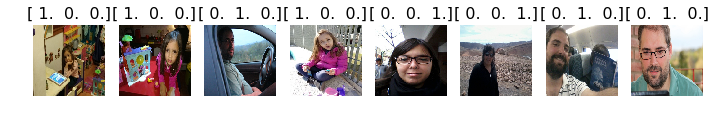

In [119]:
plots(imgs, titles=labels)

We can now pass the images to Vgg16's predict() function to get back probabilities, category indexes, and category names for each image's VGG prediction.

In [120]:
vgg.predict(imgs, True)

(array([ 0.3219,  0.7829,  0.9903,  0.3553,  0.6279,  0.5707,  0.4514,  0.1463], dtype=float32),
 array([865, 865, 785, 843, 837, 837, 785, 714]),
 [u'toyshop',
  u'toyshop',
  u'seat_belt',
  u'swing',
  u'sunglasses',
  u'sunglasses',
  u'seat_belt',
  u'pick'])

The category indexes are based on the ordering of categories used in the VGG model - e.g here are the first four:

In [121]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

(Note that, other than creating the Vgg16 object, none of these steps are necessary to build a model; they are just showing how to use the class to view imagenet predictions.)

## Use our Vgg16 class to finetune a Family members model

To change our model so that it outputs "Sabrina", "catalina" or "ignacio", instead of one of 1,000 very specific categories, we need to use a process called "finetuning". Finetuning looks from the outside to be identical to normal machine learning training - we provide a training set with data and labels to learn from, and a validation set to test against. The model learns a set of parameters based on the data provided.

However, the difference is that we start with a model that is already trained to solve a similar problem. The idea is that many of the parameters should be very similar, or the same, between the existing model, and the model we wish to create. Therefore, we only select a subset of parameters to train, and leave the rest untouched. This happens automatically when we call *fit()* after calling *finetune()*.

A 'batch' (or *mini-batch* as it is commonly known) is simply a subset of the training data - we use a subset at a time when training or predicting, in order to speed up training, and to avoid running out of memory.

In [122]:
val_batches = vgg.get_batches(path + 'valid', batch_size=batch_size)

Found 24 images belonging to 3 classes.


Calling *finetune()* modifies the model such that it will be trained based on the data in the batches provided - in this case, to predict either 'sabrina', 'catalina' or 'ignacio'.

In [123]:
vgg.finetune(batches)

Finally, we *fit()* the parameters of the model using the training data, reporting the accuracy on the validation set after every epoch. (An *epoch* is one full pass through the training data.)

In [124]:
vgg.fit(batches, val_batches, nb_epoch=10)

Epoch 1/10
77/77 [==============================] - 49s - loss: 2.5685 - acc: 0.5325 - val_loss: 1.2881 - val_acc: 0.5833
Epoch 2/10
77/77 [==============================] - 50s - loss: 0.9465 - acc: 0.7922 - val_loss: 0.3406 - val_acc: 0.8333
Epoch 3/10
77/77 [==============================] - 55s - loss: 0.6759 - acc: 0.7662 - val_loss: 0.6274 - val_acc: 0.7500
Epoch 4/10
77/77 [==============================] - 56s - loss: 0.3148 - acc: 0.9221 - val_loss: 0.3651 - val_acc: 0.8333
Epoch 5/10
77/77 [==============================] - 46s - loss: 0.3799 - acc: 0.9091 - val_loss: 0.3483 - val_acc: 0.7500
Epoch 6/10
77/77 [==============================] - 52s - loss: 0.3862 - acc: 0.9221 - val_loss: 0.4382 - val_acc: 0.7083
Epoch 7/10
77/77 [==============================] - 67s - loss: 0.1901 - acc: 0.9610 - val_loss: 0.5730 - val_acc: 0.7500
Epoch 8/10
77/77 [==============================] - 58s - loss: 0.0885 - acc: 0.9740 - val_loss: 0.6300 - val_acc: 0.7083
Epoch 9/10
77/77 [======

In [125]:
vgg.fit(batches, val_batches, nb_epoch=5)

Epoch 1/5
77/77 [==============================] - 72s - loss: 0.1567 - acc: 0.9740 - val_loss: 0.5603 - val_acc: 0.8333
Epoch 2/5
77/77 [==============================] - 70s - loss: 0.2025 - acc: 0.9481 - val_loss: 0.7693 - val_acc: 0.8333
Epoch 3/5
77/77 [==============================] - 53s - loss: 0.4638 - acc: 0.8442 - val_loss: 0.7237 - val_acc: 0.8333
Epoch 4/5
77/77 [==============================] - 48s - loss: 0.0600 - acc: 0.9870 - val_loss: 0.8512 - val_acc: 0.6667
Epoch 5/5
77/77 [==============================] - 49s - loss: 0.0719 - acc: 0.9481 - val_loss: 1.0270 - val_acc: 0.7083


(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32), array([0, 0, 1, 0, 2, 2, 1, 1]), ['catalina', 'catalina', 'ignacio', 'catalina', 'sabrina', 'sabrina', 'ignacio', 'ignacio'])


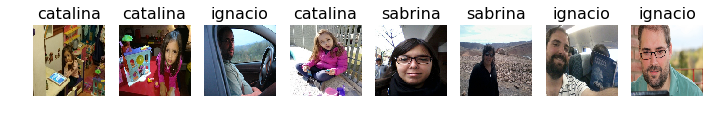

In [126]:
prediction = vgg.predict(imgs, True)
print(prediction)

plots(imgs, titles=prediction[2])

That shows all of the steps involved in using the Vgg16 class to create an image recognition model using whatever labels you are interested in. For instance, this process could classify paintings by style, or leaves by type of disease, or satellite photos by type of crop, and so forth.

(array([ 0.9984,  0.9988,  0.5491,  0.9943,  1.    ,  1.    ,  0.9032,  1.    ], dtype=float32), array([1, 1, 1, 0, 1, 2, 0, 1]), ['ignacio', 'ignacio', 'ignacio', 'catalina', 'ignacio', 'sabrina', 'catalina', 'ignacio'])


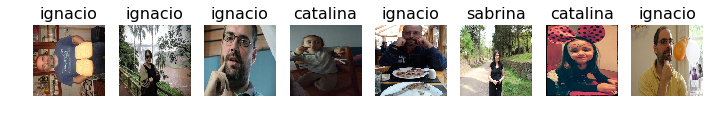

In [127]:
imgs,labels = next(val_batches)
prediction = vgg.predict(imgs, True)
print(prediction)

plots(imgs, titles=prediction[2])

Here the prediction 5 and 6 are wrong. I'll try a prediction with a test set.

Found 17 images belonging to 3 classes.
(array([ 0.9984,  0.9988,  0.5491,  0.9943,  1.    ,  1.    ,  0.9032,  1.    ], dtype=float32), array([1, 1, 1, 0, 1, 2, 0, 1]), ['ignacio', 'ignacio', 'ignacio', 'catalina', 'ignacio', 'sabrina', 'catalina', 'ignacio'])


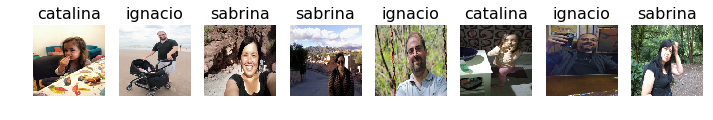

In [128]:
test_batches = vgg.get_batches(path + 'test', batch_size=batch_size)

imgs, labels = next(test_batches)
probability, idx, classes = vgg.predict(imgs, True)
print(prediction)

plots(imgs, titles=classes)

Here the fifth element was predicted as 'catalina' and should be 'ignacio'

(array([ 0.9984,  0.9988,  0.5491,  0.9943,  1.    ,  1.    ,  0.9032,  1.    ], dtype=float32), array([1, 1, 1, 0, 1, 2, 0, 1]), ['ignacio', 'ignacio', 'ignacio', 'catalina', 'ignacio', 'sabrina', 'catalina', 'ignacio'])


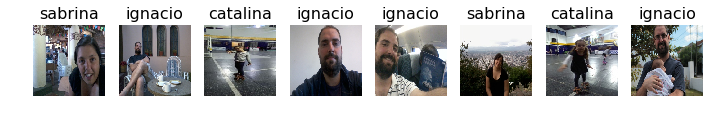

In [129]:
imgs, labels = next(test_batches)
probability, idx, classes = vgg.predict(imgs, True)
print(prediction)

plots(imgs, titles=classes)

Again we have one error in the prediction. Again the fifth element should be 'catalina' instead of 'sabrina' 